In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft

### Fourier analysis is a method for expressing a function as a sum of periodic components, and for recovering the signal from those components. 
### Fourier transform can transfrom a signal from its time domain to its frequency domain. 

The FFT of function $y[k] $ can be expressed in terms of $ n $ periodic components of $x[n]$, as given by
$$ y[k]=\sum \limits _{n=0}^{N} {e}^{-j*pi*kn/N} x[n]$$
And the inverse transform of  $y[k] $ can be expressed in terms of $x[n]$, given by
$$ x[n]=1/N \sum \limits _{k=0}^{N-1} {e}^{2*pi*j*k*n/N} y[k]$$

# Important points for Fourier Transform

1) The peak of frequency specturm specifies the most happening frequencies in the signal
2) If the peak is larger and sharper, it says about more frequent frequncy of the signal.
3) frequency value gives the location and height of frequency spectrum can be used for the input to the classification algorithm.

### Step 1: Method to generate Random Frequency signal.

N= number of observation. $$ $$
T=Time period of the signal.For example: T=24 for hourly recorded Energy Signal.$$ $$
f=frequency: $$ f=1/T $$ and $$ f=1/24 $$ for  hourly recorded Energy signal. $$ $$
Angular frequency can be defined as $$ w= 2*pi/T $$ : 
Angular frequency is used to generate  sinusoidal signal. 

# #Tutorial 1

Generate and plot the each random sinusoidal signal with N=1000, and Time period= 24 based on the following functions.
$$ y= 0.8*np.sin(100*w*N) + 0.5*np.sin(200*w*N) +0.6*np.cos(300*w*N) $$


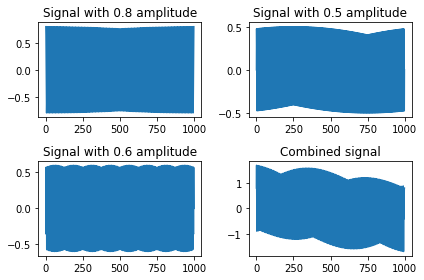

In [80]:
n=1000
T=24
angular_freq=2.0*np.pi/T
x=np.linspace(0, time_period, n)
y1=0.8*np.cos(100.0*angular_freq*x)
y2= 0.5*np.sin(200.0*angular_freq*x)
y3=0.6*np.sin(300.5*angular_freq*x)
y=y1+y2+y3
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(y1)
ax1.set(title='Signal with 0.8 amplitude')
ax2.plot(y2)
ax2.set(title='Signal with 0.5 amplitude')
ax3.plot(y3)
ax3.set(title='Signal with 0.6 amplitude')
ax4.plot(y)
ax4.set(title='Combined signal')
plt.tight_layout()
#plt.savefig('cosine_signal_behavior.png')
plt.show()


In [94]:

## FFT and power spectra calculations
# fft values 
fft_vals=fft(y)
# true theoretical fft
fft_theo=2.0/n* np.abs(fft_vals[0:n//2])
Xf=np.linspace(0.0, 1.0/(2*T), n//2)


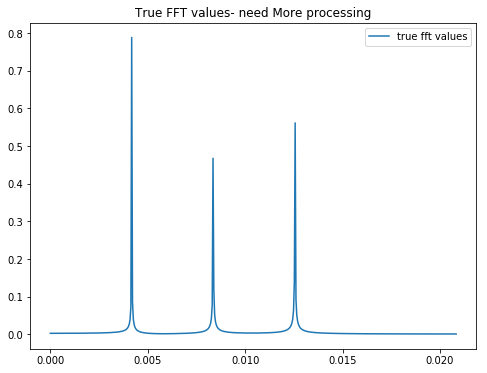

In [95]:
plt.figure(figsize=(8,6))
# plt.plot(freqs, fft_vals, label="raw fft values")
# plt.title('Raw FFT values')
plt.plot(Xf, fft_theo, label='true fft values')
plt.title("True FFT values- need More processing")
plt.legend(loc='upper right')
plt.show()

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [6]:
N = 812  # number of samples
M = 256  # length of Wiener filter
Om0 = 0.1*np.pi  # frequency of original signal
N0 = 0.1  # PSD of additive white noise

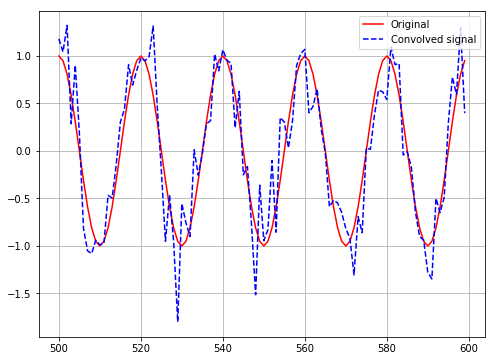

In [7]:
# generate original signal
s = np.cos(Om0 * np.arange(N))
# generate observed signal
g = 1/20*np.asarray([1, 2, 3, 4, 5, 4, 3, 2, 1])
n = np.random.normal(size=N, scale=np.sqrt(N0))
x = np.convolve(s, g, mode='same') + n
idx = np.arange(500, 600)
plt.figure(figsize=(8,6))
plt.plot(idx, s[idx], 'r-', label='Original')
plt.plot(idx, x[idx], 'b--', label='Convolved signal')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Tutorial 2: Find FFT of Energy signal.

Let take an energy signal as a input. And check the what frequencies component lies in that signal. 

In [108]:
import pandas as pd
data=pd.read_csv('Daily_Residential_November.csv')

In [109]:
data.head()

,Unnamed: 0,Day:1,Day:2,Day:3,Day:4,Day:5,Day:6,Day:7,Day:8,Day:9,...,Day:21,Day:22,Day:23,Day:24,Day:25,Day:26,Day:27,Day:28,Day:29,Day:30
0,0:AM,0.760,0.740,0.606,0.705,0.330,0.712,0.322,0.562,0.490,...,0.294,0.290,0.281,0.653,0.481,0.268,0.491,0.460,0.665,0.180
1,1:AM,0.272,0.276,0.457,0.464,0.273,0.335,0.318,0.283,0.329,...,0.195,0.254,0.260,0.233,0.311,0.253,0.279,0.252,0.216,0.157
2,2:AM,0.257,0.254,0.260,0.254,0.274,0.298,0.279,0.288,0.308,...,0.172,0.241,0.243,0.265,0.278,0.255,0.263,0.259,0.215,0.200
3,3:AM,0.240,0.251,0.226,0.235,0.260,0.269,0.279,0.275,0.297,...,0.255,0.223,0.249,0.226,0.272,0.251,0.262,0.245,0.236,0.176
4,4:AM,0.235,0.280,0.243,0.267,0.248,0.265,0.262,0.304,0.296,...,0.228,0.184,0.216,0.189,0.252,0.191,0.247,0.235,0.287,0.163


In [110]:
data.describe()

,Day:1,Day:2,Day:3,Day:4,Day:5,Day:6,Day:7,Day:8,Day:9,Day:10,...,Day:21,Day:22,Day:23,Day:24,Day:25,Day:26,Day:27,Day:28,Day:29,Day:30
count,28344.000000,28344.000000,28344.000000,28344.000000,28344.000000,28344.000000,28344.00000,28344.000000,28344.000000,28344.000000,...,28344.000000,28344.000000,28344.000000,28344.000000,28344.000000,28344.000000,28344.000000,28344.000000,28344.000000,28344.000000
mean,0.337026,0.337258,0.358525,0.393372,0.375998,0.365563,0.37292,0.364971,0.359006,0.375674,...,0.328084,0.330818,0.333461,0.350002,0.369717,0.345870,0.351689,0.347456,0.333822,0.329470
std,0.220534,0.214537,0.235126,0.279211,0.270716,0.255445,0.26460,0.244101,0.246620,0.255136,...,0.211676,0.212879,0.216357,0.227722,0.240031,0.226876,0.226456,0.229016,0.219765,0.213336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.183750,0.188000,0.194000,0.205000,0.200000,0.197000,0.20000,0.199000,0.195000,0.202000,...,0.179000,0.180000,0.184000,0.189000,0.198000,0.190000,0.193000,0.188000,0.181000,0.180000
50%,0.283000,0.288000,0.303000,0.327000,0.309000,0.303000,0.30800,0.306000,0.299000,0.315000,...,0.277000,0.280000,0.282000,0.297000,0.315000,0.292000,0.299000,0.294000,0.282000,0.278000
75%,0.436250,0.434000,0.467000,0.506000,0.477000,0.463000,0.47300,0.467000,0.457000,0.483000,...,0.425000,0.430000,0.432000,0.455000,0.483000,0.446000,0.456000,0.453000,0.431000,0.429000
max,2.762000,2.445000,3.060000,3.711000,3.516000,4.252000,3.74800,3.470000,3.324000,2.863000,...,2.499000,2.355000,2.783000,2.927000,3.564000,3.149000,2.754000,4.616000,4.121000,2.439000


In [148]:
Work_data1=data.iloc[:, 1:]
Work_data1.head()

Sum_series=Work_data1.sum(axis=1)
len(Sum_series)
Sum_series[Sum_series>50]=100

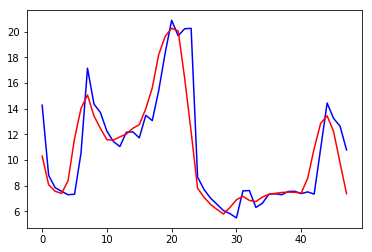

In [189]:
Input_series1=Sum_series[0:720]
input_series=Input_series.rolling(3).mean()
Input_series2=input_series[2:]
Input_series2=Input_series2.values
plt.plot(Input_series1[:48], 'b-')
plt.plot(Input_series2[:48], 'r-')
plt.show()

In [182]:
print(Input_series2)

2      10.296667
3       8.058667
4       7.556000
5       7.384333
6       8.381333
         ...    
715    15.519333
716    16.788333
717    18.297667
718    19.597000
719    19.806667
Length: 718, dtype: float64


In [198]:
def get_fft_values(signal, T, N):
    
    yf=fft(signal)
    xf=np.linspace(0, 1/(2*T), N//2)
    yf_values=2.0/N *np.abs(yf[0:N//2])

    plt.plot(xf[1:], yf_values[1:])
    #plt.axis([0, 1/(2*T), 0, 5])
    plt.tight_layout()
    plt.show()

718


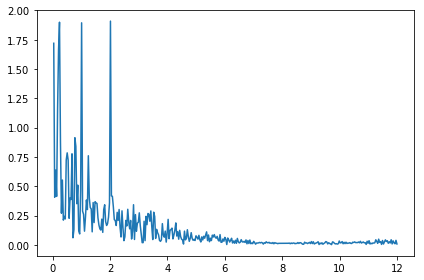

In [199]:
N=len(Input_series2)
print(N)
T=1/24 # energy is recorded in terms of daily hour.
get_fft_values(Input_series2, T, N)

It shows that, the load consumption of household are extremly random. However, we can see nearly 0.001hz, 0.4Hz and 2Hz majo

### Tutorial 3: Bonos Study: random walk

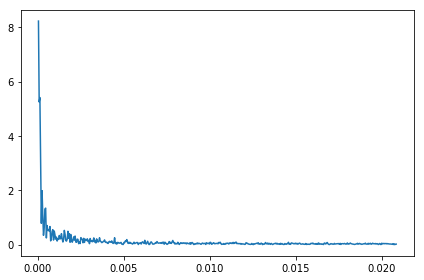

In [200]:
random_walk=list()
random_walk2=list()
random_walk.append(-1 if random()<0.5 else 1)
N=1000
for i in range(1, N):
    movement= -1 if random()<0.5 else 1
    value =random_walk[i-1] + movement
    random_walk.append(value)
    
get_fft_values(random_walk, 24, N)

